# KERNELISED LINEAR CLASSIFICATION
Import packages needed:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functions import *

# EXPLORATORY DATA ANALYSIS
File uploading:

In [2]:
file_path = '/Users/lorispalmarin/PycharmProjects/MachLear/data.csv'
df = pd.read_csv(file_path)

print("First rows of the dataset:\n", df.head())
print("\nStatistical summary:\n", df.describe())

First rows of the dataset:
          x1        x2          x3        x4        x5        x6        x7  \
0  1.205492  5.823226   98.837539 -1.075852  0.999205  0.911543  3.623558   
1  1.391530  3.611581   98.857197 -5.020318  0.677165  0.999492  3.413112   
2  1.692571 -0.887019  100.901276 -0.595548  0.177550 -0.915495  4.320264   
3  4.289320  1.416843  100.784735 -2.897154 -0.066972 -0.786173  2.093003   
4  0.542420 -1.010095  100.015580 -3.070705  0.088324 -0.242669  0.767942   

         x8        x9        x10  y  
0 -1.720267 -0.346191 -54.708330 -1  
1  4.253865  2.041603 -54.317291  1  
2  0.907834  3.126815 -56.397484 -1  
3  1.336237  2.183829 -56.197728  1  
4 -0.284683 -2.104145 -55.794045  1  

Statistical summary:
                  x1            x2            x3            x4            x5  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       1.591298      0.515879     99.848936     -1.504139      0.077645   
std        1.321185  

Remove NAs, outliers and plot variables

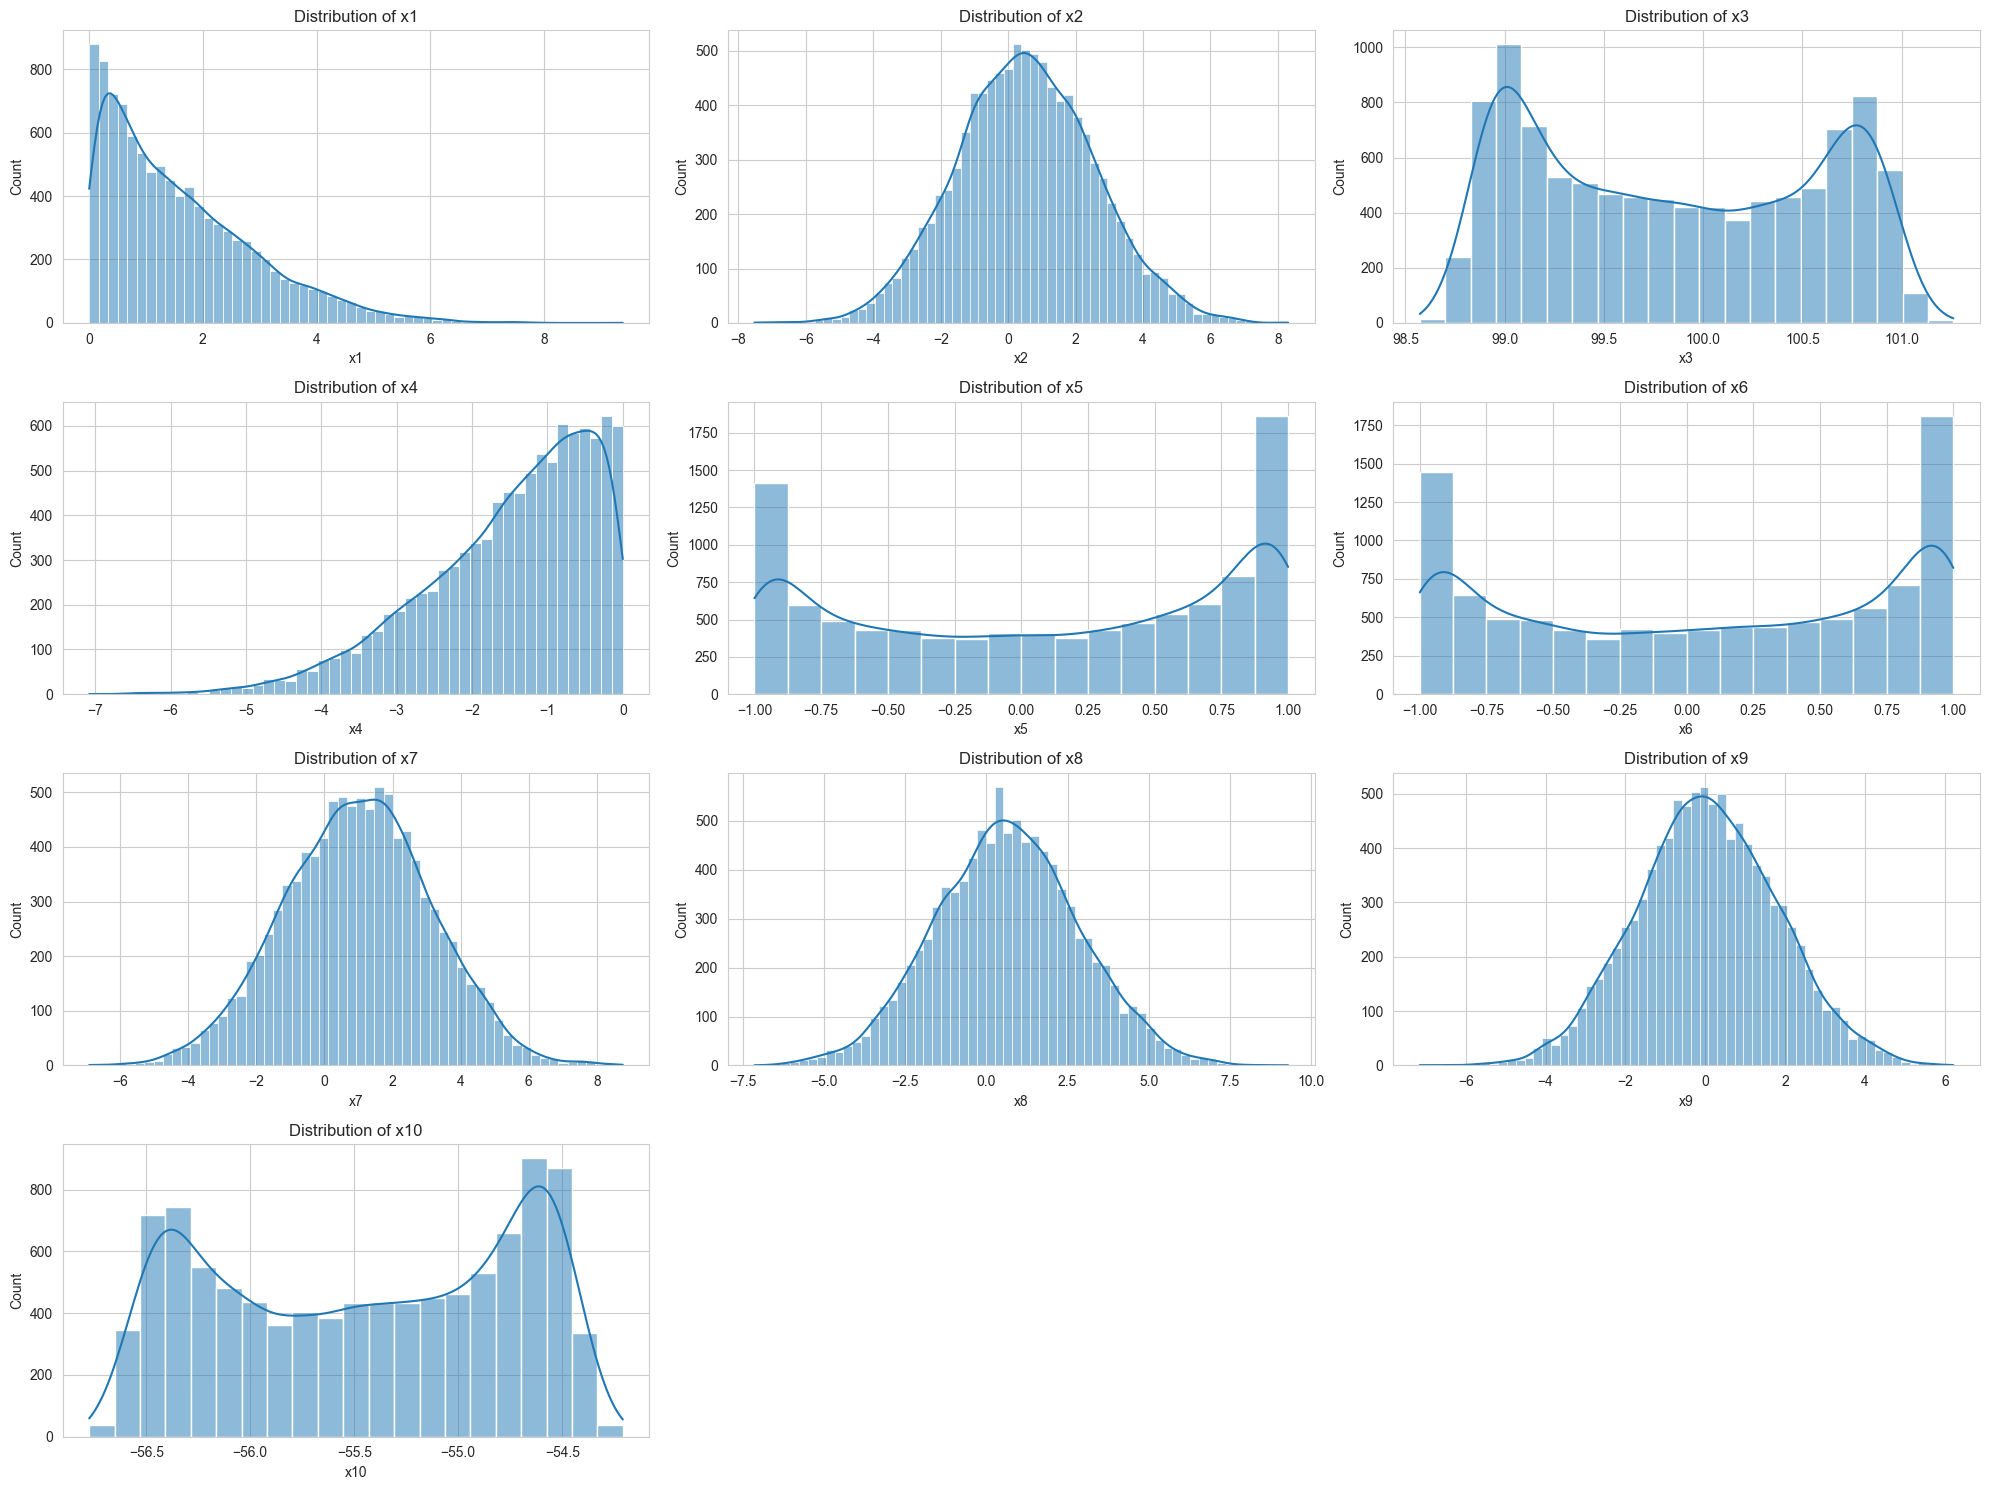

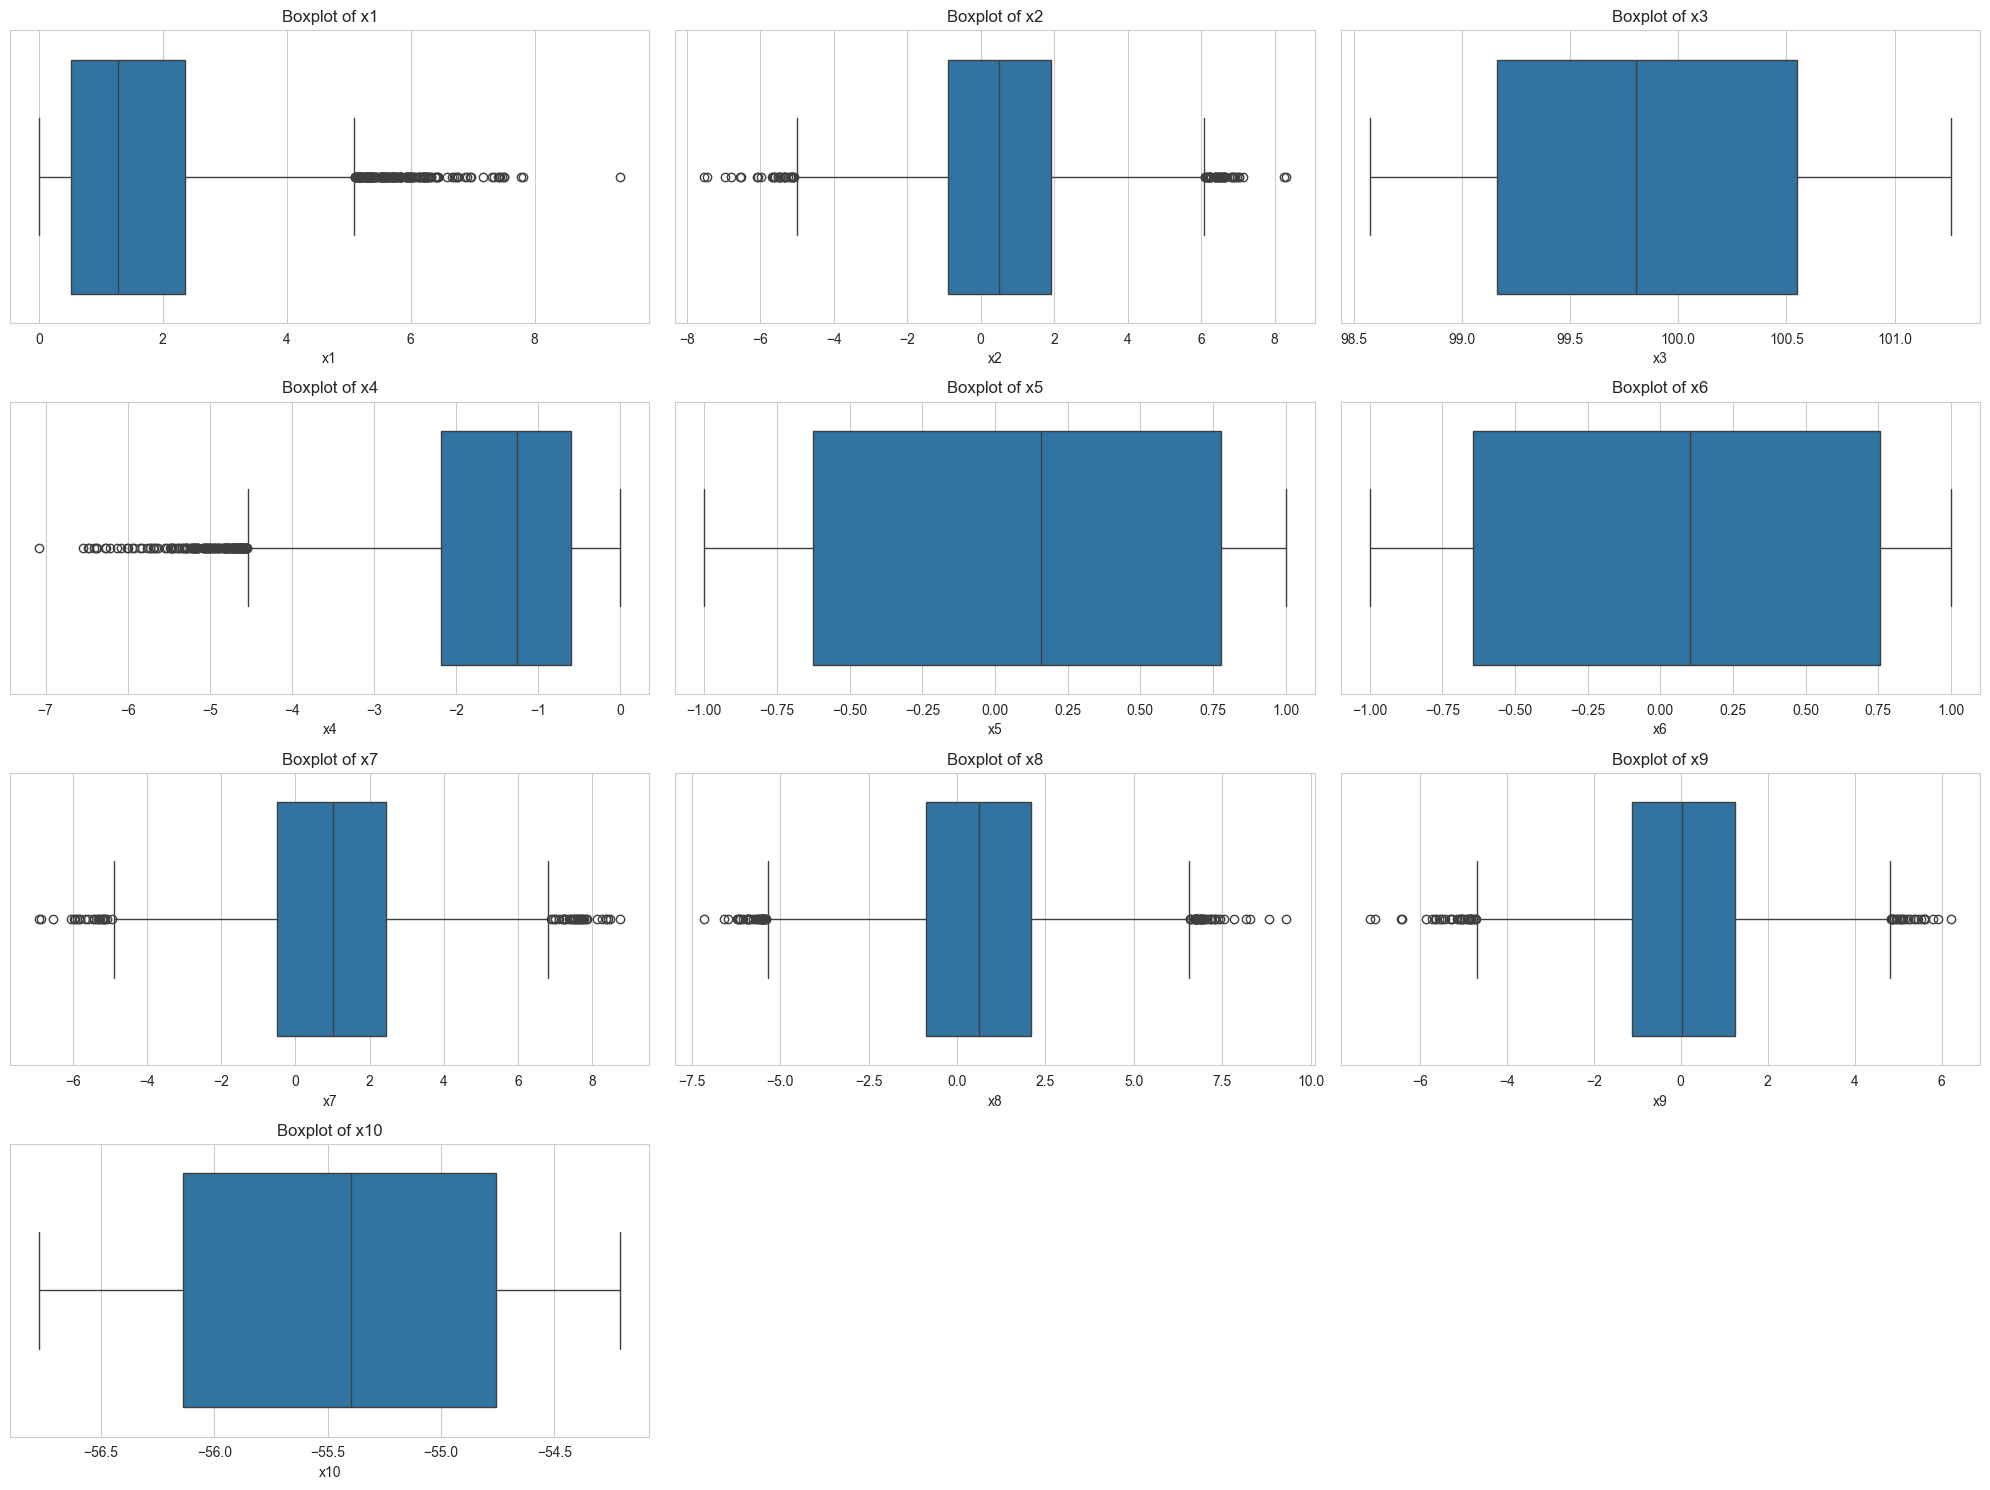

In [3]:
df = df.dropna()

num_columns = df.drop('y', axis=1).columns  # Removing target var Y

# Boxplot of xN variables
plt.figure(figsize=(20, 15))
for i, column in enumerate(num_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Boxplot to find outliers
plt.figure(figsize=(20, 15))
for i, column in enumerate(num_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

### Outliers handling - IQR method
for column in ['x2', 'x7', 'x8', 'x9']: # Cycle for each column when removing outliers
    df = remove_outliers(df, column)

Get final dimension of dataset:

In [4]:
print(f'Final dataset shape: {df.shape}')

Final dataset shape: (9733, 11)


Check of correlation (removed x6 and x10 because higly correlated with x3

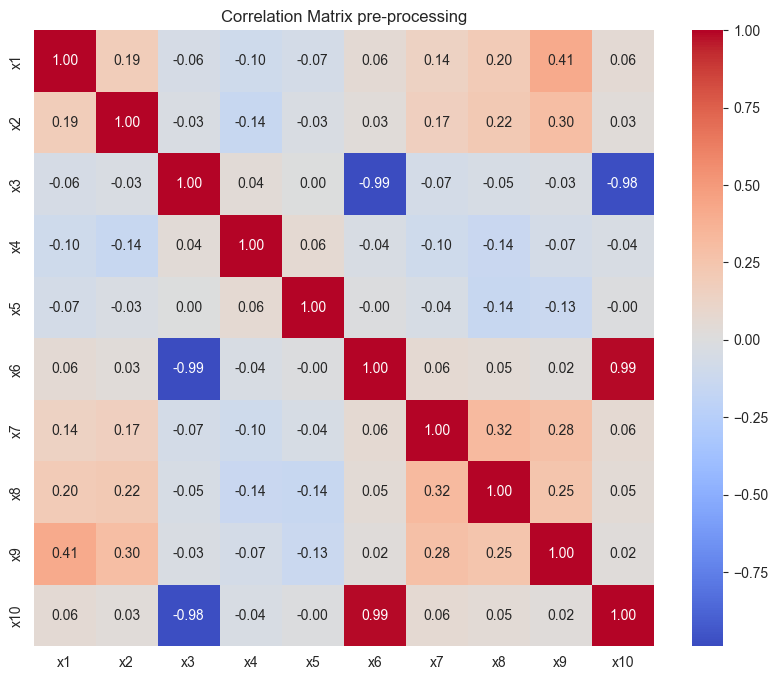

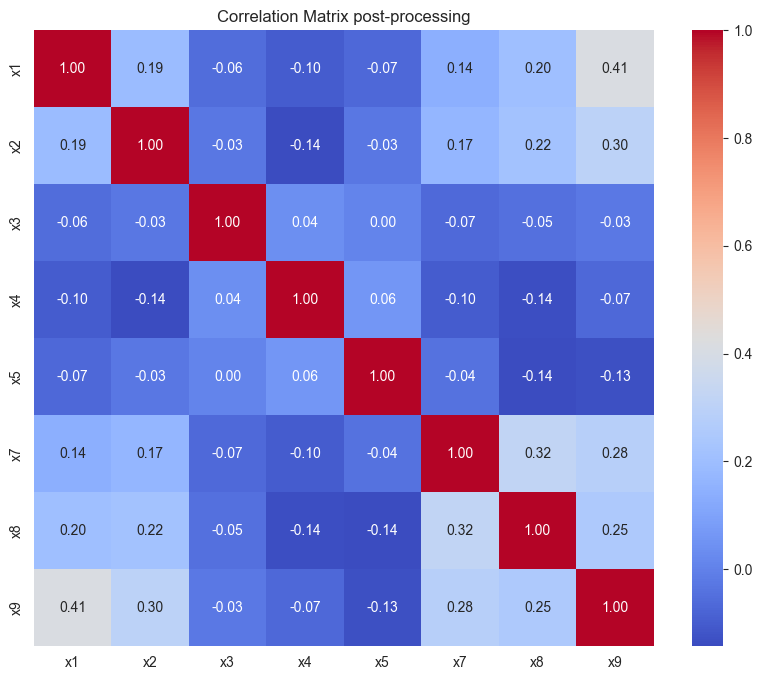

In [5]:
correlation_matrix = df.iloc[:, :10].corr()

# Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix pre-processing')
plt.show()

# Removing x6 and x10 because higly correlated
df = df.drop(['x6', 'x10'], axis=1)

# Double check of correlation
correlation_matrix = df.iloc[:, :8].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix post-processing')
plt.show()

Split in train, test set and scaling:

In [6]:
### Splitting in train and test set
X = df.drop('y', axis=1).values
y = df['y'].values
indices = np.random.permutation(len(X))
test_size = int(len(X) * 0.2)
X_train = X[indices[:-test_size]]
X_test = X[indices[-test_size:]]
y_train = y[indices[:-test_size]]
y_test = y[indices[-test_size:]]


### Feature scaling - Fit on training set, then transformation of both traind and test set IMPORTANTE PER DATA LEAKAGE
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
std += 1e-8
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Last check
print("\nStatistical summary of training set after standardisation:\n", pd.DataFrame(X_train).describe())


Statistical summary of training set after standardisation:
                   0             1             2             3             4  \
count  7.787000e+03  7.787000e+03  7.787000e+03  7.787000e+03  7.787000e+03   
mean   1.924406e-15 -3.467397e-16  6.981888e-13 -1.039307e-15 -2.363305e-16   
std    1.000064e+00  1.000064e+00  1.000064e+00  1.000064e+00  1.000064e+00   
min   -1.210954e+00 -2.767029e+00 -1.789291e+00 -4.526150e+00 -1.521801e+00   
25%   -8.107918e-01 -6.974015e-01 -9.707567e-01 -5.900739e-01 -9.944727e-01   
50%   -2.352599e-01 -4.787672e-03 -7.378732e-02  2.101050e-01  1.219910e-01   
75%    5.769445e-01  6.911515e-01  9.722739e-01  7.961374e-01  9.857141e-01   
max    6.005890e+00  2.809973e+00  1.995464e+00  1.326457e+00  1.303817e+00   

                  5             6             7  
count  7.787000e+03  7.787000e+03  7.787000e+03  
mean   1.450832e-16  3.403524e-16  1.637889e-16  
std    1.000064e+00  1.000064e+00  1.000064e+00  
min   -2.788219e+00 -2.7583

# PERCEPTRON
Running Perceptron with 3 different max_epochs: (1000, 2000, 5000) using 5-fold cross-validation:

In [9]:
#Initialising models and cross validation
perceptron_model = Perceptron(max_epochs=1000)
perceptron_model2 = Perceptron(max_epochs=2000)
perceptron_model3 = Perceptron(max_epochs=5000)

kf = KFold(X_train, y_train, k=5)

# Executing cross-validation
scores = cross_val_score(perceptron_model, X_train, y_train, kf)
scores2 = cross_val_score(perceptron_model2, X_train, y_train, kf)
scores3 = cross_val_score(perceptron_model3, X_train, y_train, kf)

# Results
print("Accuracy scores for each fold (1000 epochs):", scores)
print("Mean cross-validation accuracy (1000 epochs):", np.mean(scores))
print("Accuracy scores for each fold (2000 epochs):", scores2)
print("Mean cross-validation accuracy (2000 epochs):", np.mean(scores2))
print("Accuracy scores for each fold (5000 epochs):", scores3)
print("Mean cross-validation accuracy (5000 epochs):", np.mean(scores3))

Training with parameters: max_epochs=1000
Max epochs (1000) reached. NO convergence.
Accuracy on training set: 0.6378
Training with parameters: max_epochs=1000
Max epochs (1000) reached. NO convergence.
Accuracy on training set: 0.6056
Training with parameters: max_epochs=1000
Max epochs (1000) reached. NO convergence.
Accuracy on training set: 0.6030
Training with parameters: max_epochs=1000
Max epochs (1000) reached. NO convergence.
Accuracy on training set: 0.5432
Training with parameters: max_epochs=1000
Max epochs (1000) reached. NO convergence.
Accuracy on training set: 0.5397
Training with parameters: max_epochs=2000
Max epochs (2000) reached. NO convergence.
Accuracy on training set: 0.6313
Training with parameters: max_epochs=2000
Max epochs (2000) reached. NO convergence.
Accuracy on training set: 0.6025
Training with parameters: max_epochs=2000
Max epochs (2000) reached. NO convergence.
Accuracy on training set: 0.6860
Training with parameters: max_epochs=2000
Max epochs (20

Choose best model and fit on test set:

In [10]:
# Choosing best model basing on performances
best_model = Perceptron(max_epochs=2000)

# Training the best model on whole training set
best_model.fit(X_train, y_train)

# Predicting labels on test set
y_pred = best_model.predict(X_test)

# Computing and printing accuracy on test set
accuracy = np.mean(y_test == y_pred)
loss = np.mean( y_test != y_pred)
print(f'Accuracy on test set: {accuracy:.4f}')
print(f'Misclassification rate on test set: {loss:.4f}')

Training with parameters: max_epochs=2000
Max epochs (2000) reached. NO convergence.
Accuracy on training set: 0.6303
Accuracy on test set: 0.6269
Misclassification rate on test set: 0.3731


# SVM w/PEGASOS UPDATE
Running Support Vector Machine with different values of parameters
Using grid search with 5-fold cross validation:

In [13]:
# Defining different combinations of parameters
param_grid = {'lambda_param': [0.001, 1, 3, 5],
              'max_iter': [1000, 20000, 50000]}
print(param_grid)

# Cross-validation
folds = KFold(X_train, y_train, k=5)

# Iteration over all combinations of parameters
best_score = -np.inf
best_params = None

for lambda_param in param_grid['lambda_param']:
    for max_iter in param_grid['max_iter']:

        # Initialising model with different parameters
        pegasos_svm = PegasosSVM(lambda_param=lambda_param, max_iter=max_iter)

        # Cross-validation
        scores = cross_val_score(pegasos_svm, X_train, y_train, folds)
        mean_score = np.mean(scores)
        print('Accuracy with lambda (', lambda_param, ') and max_iter (', max_iter, ') is ',mean_score)

        # Updating best scores and parameters
        if mean_score > best_score:
            best_score = mean_score
            best_params = {'lambda_param': lambda_param, 'max_iter': max_iter}


# Printing best Parameters and Accuracy
print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Accuracy: {best_score:.4f}')

{'lambda_param': [0.001, 1, 3, 5], 'max_iter': [1000, 20000, 50000]}
Training with parameters: max_iter: 1000, lambda: 0.001
Accuracy on training set: 0.7148
Training with parameters: max_iter: 1000, lambda: 0.001
Accuracy on training set: 0.6983
Training with parameters: max_iter: 1000, lambda: 0.001
Accuracy on training set: 0.7000
Training with parameters: max_iter: 1000, lambda: 0.001
Accuracy on training set: 0.6826
Training with parameters: max_iter: 1000, lambda: 0.001
Accuracy on training set: 0.6780
Accuracy with lambda ( 0.001 ) and max_iter ( 1000 ) is  0.6967629728016174
Training with parameters: max_iter: 20000, lambda: 0.001
Accuracy on training set: 0.7240
Training with parameters: max_iter: 20000, lambda: 0.001
Accuracy on training set: 0.7258
Training with parameters: max_iter: 20000, lambda: 0.001
Accuracy on training set: 0.7236
Training with parameters: max_iter: 20000, lambda: 0.001
Accuracy on training set: 0.7155
Training with parameters: max_iter: 20000, lambda:

Choose best model and fit on test set:

In [20]:
# Training model with best parameters
best_model = PegasosSVM(lambda_param=0.001, max_iter=20000)
best_model.fit(X_train, y_train)

# Predicting labels of test set
y_pred = best_model.predict(X_test)

# Computing and printing accuracy on test set
accuracy = np.mean(y_test == y_pred)
loss = np.mean( y_test != y_pred)
print(f'Accuracy on test set: {accuracy:.4f}')
print(f'Misclassification rate on test set: {loss:.4f}')

Training with parameters: max_iter: 20000, lambda: 0.001
Accuracy on training set: 0.7195
Accuracy on test set: 0.7205
Misclassification rate on test set: 0.2795


# LOGISTIC CLASSIFICATION w/PEGASOS UPDATES (LOGISTIC LOSS)
Running Regularised Logistic Classification with different values of parameters 
Grid search with 5-fold cross validation:

In [21]:
# Different combinations of parameters to test
param_grid = {'lambda_param': [0.001, 1, 5],
              'max_iter': [1000, 20000, 50000]}

# Cross-validation
folds = KFold(X_train, y_train, k=5)

# Iterating over all combinations of parameters
best_score = -np.inf
best_params = None

for lambda_param in param_grid['lambda_param']:
    for max_iter in param_grid['max_iter']:

        # Initialising model with different parameters
        logistic_model = PegasosLogisticClassification(lambda_param=lambda_param, max_iter=max_iter)

        # Cross-validation
        scores = cross_val_score(logistic_model, X_train, y_train, folds)
        mean_score = np.mean(scores)
        print('Accuracy with lambda (', lambda_param, ') and max_iter (', max_iter, ') is ', mean_score)

        # Updating best score and parameters, if necessary
        if mean_score > best_score:
            best_score = mean_score
            best_params = {'lambda_param': lambda_param, 'max_iter': max_iter}


# Printing best Parameters and Accuracy.
print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Accuracy: {best_score:.4f}')

Training with parameters: max_iter: 1000, lambda: 0.001
Training with parameters: max_iter: 1000, lambda: 0.001
Training with parameters: max_iter: 1000, lambda: 0.001
Training with parameters: max_iter: 1000, lambda: 0.001
Training with parameters: max_iter: 1000, lambda: 0.001
Accuracy with lambda ( 0.001 ) and max_iter ( 1000 ) is  0.7009099655949405
Training with parameters: max_iter: 20000, lambda: 0.001
Training with parameters: max_iter: 20000, lambda: 0.001
Training with parameters: max_iter: 20000, lambda: 0.001
Training with parameters: max_iter: 20000, lambda: 0.001
Training with parameters: max_iter: 20000, lambda: 0.001
Accuracy with lambda ( 0.001 ) and max_iter ( 20000 ) is  0.7181171124154199
Training with parameters: max_iter: 50000, lambda: 0.001
Training with parameters: max_iter: 50000, lambda: 0.001
Training with parameters: max_iter: 50000, lambda: 0.001
Training with parameters: max_iter: 50000, lambda: 0.001
Training with parameters: max_iter: 50000, lambda: 0.0

Choose best model and fit on test set:

In [22]:
# Training model with best parameters
best_model = PegasosLogisticClassification(lambda_param=0.001, max_iter=50000)
best_model.fit(X_train, y_train)

# Predicting labels of test set
y_pred = best_model.predict(X_test)

# Computing and printing accuracy on test set
accuracy = np.mean(y_test == y_pred)
loss = np.mean( y_test != y_pred)
print(f'Accuracy on test set: {accuracy:.4f}')
print(f'Misclassification rate on test set: {loss:.4f}')

Training with parameters: max_iter: 50000, lambda: 0.001
Accuracy on test set: 0.7199
Misclassification rate on test set: 0.2801


# POLYNOMIAL FEATURE EXPANSION OF DEGREE 2
Applying polynomial feature expansion of degree 2:

In [23]:
# Creating new test and training set
X_train_poly = polynomial_feature_expansion(X_train)
X_test_poly = polynomial_feature_expansion(X_test)

print("\nShape of original features:", X_train.shape)
print("Shape of features after polynomial expansion:", X_train_poly.shape)


# Generating features names
feature_names = ['x' + str(i + 1) for i in range(X_train.shape[1])]
poly_feature_names = feature_names[:]

for i in range(len(feature_names)):
    for j in range(i, len(feature_names)):
        poly_feature_names.append(feature_names[i] + '*' + feature_names[j])

print(f'New list of features: {poly_feature_names}')


Shape of original features: (7787, 8)
Shape of features after polynomial expansion: (7787, 44)
New list of features: ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x1*x1', 'x1*x2', 'x1*x3', 'x1*x4', 'x1*x5', 'x1*x6', 'x1*x7', 'x1*x8', 'x2*x2', 'x2*x3', 'x2*x4', 'x2*x5', 'x2*x6', 'x2*x7', 'x2*x8', 'x3*x3', 'x3*x4', 'x3*x5', 'x3*x6', 'x3*x7', 'x3*x8', 'x4*x4', 'x4*x5', 'x4*x6', 'x4*x7', 'x4*x8', 'x5*x5', 'x5*x6', 'x5*x7', 'x5*x8', 'x6*x6', 'x6*x7', 'x6*x8', 'x7*x7', 'x7*x8', 'x8*x8']


Initializing models and parameters

In [24]:
# Perceptron
perceptron_model = Perceptron(max_epochs=1000)
perceptron_max_iter_grid = [1000, 2000, 5000]

# SVM with Pegasos
svm_model = PegasosSVM(lambda_param=0.01, max_iter=1000)
svm_params = {'lambda_param': [0.001, 1, 5], 'max_iter': [1000, 20000, 50000]}

# Regularized Logistic Classification with Pegasos
logistic_model = PegasosLogisticClassification(lambda_param=0.01, max_iter=1000)
logistic_params = {'lambda_param': [0.001, 1, 5], 'max_iter': [1000, 20000, 50000]}

Perceptron:

In [17]:
best_params_perceptron = cross_val_model_perceptron(perceptron_model, perceptron_max_iter_grid, X_train, y_train, X_train_poly)
# Retrain model with best parameters
perceptron_model.set_params(max_epochs=1000)
perceptron_model.fit(X_train_poly, y_train)

print("\nEvaluation of Perceptron on test set:")
evaluate_model_on_test(perceptron_model, X_train_poly, y_train, X_test_poly, y_test)

Training with parameters: max_epochs=1000
Max epochs (1000) reached. NO convergence.
Accuracy on training set: 0.6074
Training with parameters: max_epochs=1000
Max epochs (1000) reached. NO convergence.
Accuracy on training set: 0.6572
Training with parameters: max_epochs=1000
Max epochs (1000) reached. NO convergence.
Accuracy on training set: 0.6521
Training with parameters: max_epochs=1000
Max epochs (1000) reached. NO convergence.
Accuracy on training set: 0.6561
Training with parameters: max_epochs=1000
Max epochs (1000) reached. NO convergence.
Accuracy on training set: 0.6218
Accuracy with max_iter ( 1000 ) is  0.6414135343057111
Training with parameters: max_epochs=1000
Max epochs (1000) reached. NO convergence.
Accuracy on training set: 0.9216
Training with parameters: max_epochs=1000
Max epochs (1000) reached. NO convergence.
Accuracy on training set: 0.9186
Training with parameters: max_epochs=1000
Max epochs (1000) reached. NO convergence.
Accuracy on training set: 0.9268
T

SVM w/ Pegasos updates:

In [18]:
best_params_svm = cross_val_model(svm_model, svm_params, X_train, y_train, X_train_poly)
#Retrain model with best parameters
svm_model.set_params(lambda_param=0.001, max_iter=50000)
svm_model.fit(X_train_poly, y_train)

print("\nEvaluation of SVM with Pegasos on test set:")
evaluate_model_on_test(svm_model, X_train_poly, y_train, X_test_poly, y_test)

Training with parameters: max_iter: 1000, lambda: 0.001
Accuracy on training set: 0.6493
Training with parameters: max_iter: 1000, lambda: 0.001
Accuracy on training set: 0.6972
Training with parameters: max_iter: 1000, lambda: 0.001
Accuracy on training set: 0.6937
Training with parameters: max_iter: 1000, lambda: 0.001
Accuracy on training set: 0.6860
Training with parameters: max_iter: 1000, lambda: 0.001
Accuracy on training set: 0.7231
Accuracy with lambda ( 0.001 ) and max_iter ( 1000 ) is  0.6859803298367635
Training with parameters: max_iter: 1000, lambda: 0.001
Accuracy on training set: 0.8276
Training with parameters: max_iter: 1000, lambda: 0.001
Accuracy on training set: 0.8497
Training with parameters: max_iter: 1000, lambda: 0.001
Accuracy on training set: 0.8244
Training with parameters: max_iter: 1000, lambda: 0.001
Accuracy on training set: 0.8377
Training with parameters: max_iter: 1000, lambda: 0.001
Accuracy on training set: 0.8446
Accuracy with max_iter ( 1000 ) an

Regularised Logistic Classification:

In [19]:
best_params_logistic = cross_val_model(logistic_model, logistic_params, X_train, y_train, X_train_poly)
# Retrain model with best parameters
logistic_model.set_params(**best_params_logistic)
logistic_model.fit(X_train_poly, y_train)

print("\nEvaluation of Logistic Classification on test set:")
evaluate_model_on_test(logistic_model, X_train_poly, y_train, X_test_poly, y_test)

Training with parameters: max_iter: 1000, lambda: 0.001
Training with parameters: max_iter: 1000, lambda: 0.001
Training with parameters: max_iter: 1000, lambda: 0.001
Training with parameters: max_iter: 1000, lambda: 0.001
Training with parameters: max_iter: 1000, lambda: 0.001
Accuracy with lambda ( 0.001 ) and max_iter ( 1000 ) is  0.6962493290889709
Training with parameters: max_iter: 1000, lambda: 0.001
Training with parameters: max_iter: 1000, lambda: 0.001
Training with parameters: max_iter: 1000, lambda: 0.001
Training with parameters: max_iter: 1000, lambda: 0.001
Training with parameters: max_iter: 1000, lambda: 0.001
Accuracy with max_iter ( 1000 ) and lambda ( 0.001 ) is 0.841250866722236
Training with parameters: max_iter: 20000, lambda: 0.001
Training with parameters: max_iter: 20000, lambda: 0.001
Training with parameters: max_iter: 20000, lambda: 0.001
Training with parameters: max_iter: 20000, lambda: 0.001
Training with parameters: max_iter: 20000, lambda: 0.001
Accur

Compare weights before and after polynomial expansion on:

PERCEPTRON:

In [20]:
compare_weights(perceptron_model, feature_names, poly_feature_names, X_train, X_train_poly, y_train)

Training with parameters: max_epochs=1000
Max epochs (1000) reached. NO convergence.
Accuracy on training set: 0.5965
Training with parameters: max_epochs=1000
Max epochs (1000) reached. NO convergence.
Accuracy on training set: 0.9253
Original features weights:
  Feature    Weight  Abs_Weight
2      x3  3.789443    3.789443
0      x1  2.525328    2.525328
3      x4 -2.098506    2.098506
1      x2  1.621805    1.621805
5      x6  1.240185    1.240185
4      x5 -1.193362    1.193362
6      x7 -0.535968    0.535968
7      x8  0.049100    0.049100
Features weights after polynomial expansion:
   Feature      Weight  Abs_Weight
22   x2*x8  123.869313  123.869313
6       x7   81.344184   81.344184
14   x1*x7   54.413496   54.413496
32   x4*x7  -54.324621   54.324621
0       x1   31.039206   31.039206
7       x8   30.851170   30.851170
4       x5   27.340585   27.340585
3       x4  -19.814763   19.814763
5       x6   19.647048   19.647048
29   x4*x4  -14.872957   14.872957
2       x3    9.414

SVM WITH PEGASOS UPDATES:

In [21]:
compare_weights(svm_model, feature_names, poly_feature_names, X_train, X_train_poly, y_train)

Training with parameters: max_iter: 50000, lambda: 0.001
Accuracy on training set: 0.7189
Training with parameters: max_iter: 50000, lambda: 0.001
Accuracy on training set: 0.9454
Original features weights:
  Feature    Weight  Abs_Weight
6      x7  1.229079    1.229079
5      x6  0.660283    0.660283
4      x5  0.647088    0.647088
0      x1  0.545845    0.545845
3      x4 -0.416600    0.416600
2      x3  0.326050    0.326050
7      x8  0.200916    0.200916
1      x2  0.031301    0.031301
Features weights after polynomial expansion:
   Feature     Weight  Abs_Weight
22   x2*x8  10.033491   10.033491
6       x7   6.802734    6.802734
14   x1*x7   4.265767    4.265767
32   x4*x7  -4.064018    4.064018
7       x8   2.656335    2.656335
4       x5   2.632518    2.632518
0       x1   2.392103    2.392103
3       x4  -1.984990    1.984990
5       x6   1.903667    1.903667
2       x3   1.206473    1.206473
11   x1*x4  -1.124160    1.124160
9    x1*x2   0.757543    0.757543
23   x3*x3  -0.651

REGULARISED LOGISTIC CLASSIFICATION:

In [22]:
compare_weights(logistic_model, feature_names, poly_feature_names, X_train, X_train_poly, y_train)

Training with parameters: max_iter: 50000, lambda: 0.001
Training with parameters: max_iter: 50000, lambda: 0.001
Original features weights:
  Feature    Weight  Abs_Weight
6      x7  1.036446    1.036446
0      x1  0.547857    0.547857
4      x5  0.468262    0.468262
5      x6  0.465899    0.465899
3      x4 -0.462880    0.462880
2      x3  0.298832    0.298832
7      x8  0.218139    0.218139
1      x2 -0.100494    0.100494
Features weights after polynomial expansion:
   Feature    Weight  Abs_Weight
22   x2*x8  9.736815    9.736815
6       x7  6.011866    6.011866
14   x1*x7  3.625606    3.625606
32   x4*x7 -3.231436    3.231436
7       x8  2.400278    2.400278
4       x5  2.293421    2.293421
0       x1  1.994717    1.994717
5       x6  1.782025    1.782025
3       x4 -1.660010    1.660010
2       x3  1.131167    1.131167
11   x1*x4 -0.876603    0.876603
16   x2*x2  0.690253    0.690253
39   x6*x7  0.614730    0.614730
23   x3*x3 -0.566475    0.566475
29   x4*x4 -0.557609    0.55760

# KERNELISED VERSION OF PERCEPTRON

In [7]:
# INITIALISING MODELS with polynomial and gaussian kernels
kperceptron_gaussian = KernelPerceptron(max_epochs=1000, kernel=gaussian_kernel)
param_grid = {'gamma': [0.0001, 1, 5], 'max_epochs': [1000]}
kperceptron_polynomial = KernelPerceptron(max_epochs=1000, kernel=polynomial_kernel)
param_grid_2 = {'degree': [2, 3, 4], 'max_epochs': [1000]}

Running Kernelised Perceptron with gaussian kernel:

In [8]:
best_params_kpg = cross_val_model_kernel(kperceptron_gaussian, param_grid, X_train, y_train, kernel_type='gaussian')
kperceptron_gaussian.set_params(**best_params_kpg)
kperceptron_gaussian.fit(X_train, y_train)

Convergence reached at epoch 5
Convergence reached at epoch 6
Convergence reached at epoch 5
Convergence reached at epoch 5
Convergence reached at epoch 5
Accuracy with max_epochs ( 1000 ) and gamma ( 0.0001 ) is 0.822781541475287
Convergence reached at epoch 5
Convergence reached at epoch 6
Convergence reached at epoch 5
Convergence reached at epoch 5
Convergence reached at epoch 5
Accuracy with max_epochs ( 1000 ) and gamma ( 1 ) is 0.822781541475287
Convergence reached at epoch 5
Convergence reached at epoch 6
Convergence reached at epoch 5
Convergence reached at epoch 5
Convergence reached at epoch 5
Accuracy with max_epochs ( 1000 ) and gamma ( 5 ) is 0.822781541475287
Best Parameters for Perceptron (gaussian kernel): {'gamma': 0.0001, 'max_epochs': 1000}
Best Cross-Validation Accuracy for Kernelised Perceptron: 0.8228
Convergence reached at epoch 5


Running Kernelised Perceptron with polynomial kernel:

In [ ]:
best_params_kpp = cross_val_model_kernel(kperceptron_polynomial, param_grid_2, X_train, y_train, kernel_type='polynomial')

In [ ]:
kperceptron_polynomial.set_params(**best_params_kpp)
kperceptron_polynomial.fit(X_train, y_train)

Evaluation on test set:

In [11]:
# Predicting labels of test set with POLYONMIAL
y_pred = kperceptron_polynomial.predict(X_test)
# Computing and printing accuracy
accuracy = np.mean(y_test == y_pred)
loss = np.mean(y_test != y_pred)
print(f'Accuracy on test set (polynomial kernel): {accuracy:.4f}')
print(f'Loss on test set (polynomial kernel): {loss:.4f}')

[0 0 0 ... 0 0 0]
Accuracy on test set (polynomial kernel): 0.0000
Loss on test set (polynomial kernel): 1.0000


In [12]:
# Predicting labels of test set with GAUSSIAN
y_pred = kperceptron_gaussian.predict(X_test)
# Computing and printing accuracy
accuracy = np.mean(y_test == y_pred)
loss = np.mean(y_test != y_pred)
print(f'Accuracy on test set (gaussian kernel): {accuracy:.4f}')
print(f'Loss on test set (gaussian kernel): {loss:.4f}')

Accuracy on test set (gaussian kernel): 0.8207
Loss on test set (gaussian kernel): 0.1793


# KERNELISED VERSION OF PEGASOS FOR SVM

In [7]:
# Definizione del Kernel Pegasos SVM con kernel gaussiano e polinomiale
kpegasos_gaussian = KernelPegasosSVM(kernel=gaussian_kernel)
param_grid_gaussian = {'gamma': [0.001, 10, 100], 'lambda_param': [0.01, 0.1, 1]}

kpegasos_polynomial = KernelPegasosSVM(max_iter=1000, kernel=polynomial_kernel)
param_grid_polynomial = {'degree': [2, 3, 4], 'lambda_param': [0.001, 0.01, 0.1]}

Running Kernelised Pegasos SVM with gaussian kernel:

In [15]:
best_params_kpg = cross_val_model_kernelSVM(kpegasos_gaussian, param_grid_gaussian, X_train, y_train, kernel_type='gaussian')

Accuracy with lambda ( 0.01 ) and gamma ( 0.001 ) is 0.8172581814044486
Accuracy with lambda ( 0.1 ) and gamma ( 0.001 ) is 0.8139183430167127
Accuracy with lambda ( 1 ) and gamma ( 0.001 ) is 0.8056997138270743
Accuracy with lambda ( 0.01 ) and gamma ( 10 ) is 0.8085259909489878
Accuracy with lambda ( 0.1 ) and gamma ( 10 ) is 0.8136630876500428
Accuracy with lambda ( 1 ) and gamma ( 10 ) is 0.8171289872314604
Accuracy with lambda ( 0.01 ) and gamma ( 100 ) is 0.8076273205689161
Accuracy with lambda ( 0.1 ) and gamma ( 100 ) is 0.8013358858870001
Accuracy with lambda ( 1 ) and gamma ( 100 ) is 0.810066922086927
Best Parameters for Pegasos SVM (gaussian kernel): {'gamma': 0.001, 'lambda_param': 0.01}
Best Cross-Validation Accuracy for Pegasos SVM: 0.8173


In [16]:
kpegasos_gaussian.set_params(**best_params_kpg)
kpegasos_gaussian.fit(X_train, y_train)

Running Kernelised Pegasos SVM with Polynomial Kernel

In [8]:
best_params_kpp = cross_val_model_kernelSVM(kpegasos_polynomial, param_grid_polynomial, X_train, y_train,kernel_type='polynomial')

Accuracy with lambda (0.001) and degree (2) is 0.8218842726912209
Accuracy with lambda (0.01) and degree (2) is 0.8211080358445813
Accuracy with lambda (0.1) and degree (2) is 0.838705321035565
Accuracy with lambda (0.001) and degree (3) is 0.822780387219753
Accuracy with lambda (0.01) and degree (3) is 0.834851756488359
Accuracy with lambda (0.1) and degree (3) is 0.8186712375185815
Accuracy with lambda (0.001) and degree (4) is 0.8308743568117153
Accuracy with lambda (0.01) and degree (4) is 0.8283080345254319
Accuracy with lambda (0.1) and degree (4) is 0.8324139688004729
Best Parameters for Pegasos SVM (polynomial kernel): {'degree': 2, 'lambda_param': 0.1}
Best Cross-Validation Accuracy for Pegasos SVM: 0.8387


Evaluation on test set:

In [9]:
kpegasos_polynomial.set_params(degree=2, lambda_param=0.1)
kpegasos_polynomial.fit(X_train, y_train)
# Predicting labels of test set with POLYNOMIAL
y_pred = kpegasos_polynomial.predict(X_test)
# Computing and printing accuracy
accuracy = np.mean(y_test == y_pred)
loss = np.mean(y_test != y_pred)
print(f'Accuracy on test set (polynomial kernel): {accuracy:.4f}')
print(f'Loss on test set (polynomial kernel): {loss:.4f}')

Accuracy on test set (polynomial kernel): 0.8294
Loss on test set (polynomial kernel): 0.1706


In [18]:
# Predicting labels of test set with GAUSSIAN
y_pred = kpegasos_gaussian.predict(X_test)
# Computing and printing accuracy
accuracy = np.mean(y_test == y_pred)
loss = np.mean(y_test != y_pred)
print(f'Accuracy on test set (gaussian kernel): {accuracy:.4f}')
print(f'Loss on test set (gaussian kernel): {loss:.4f}')

Accuracy on test set (gaussian kernel): 0.8279
Loss on test set (gaussian kernel): 0.1721
